In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

gas_textGW = pd.read_csv('gastext-1.csv', encoding='latin-1')

# messy csv file so I changed the encoding to 'latin-1', messy in the comment section.

Saving gastext-1.csv to gastext-1.csv


In [3]:
gas_textGW.shape

(287, 15)

In [4]:
gas_textGW

,Cust_ID,Comment,Target,Service_flag,CustType_flag,Contact_flag,new_flag,Choice_flag,Loyal_Status,Comp_card_flag,AcctType_flag,Contact_Flag2,HQ_flag,Multi_flag,NewCust_Flag
0,1,prices ...,1,2,2,1,2,1,1,0,0,0,0,0,0
1,10,"clean shower and restroom, easy in and out ...",1,1,1,1,2,1,1,0,0,0,0,0,0
2,100,productx price and rewards ...,0,1,2,2,2,1,1,0,0,0,0,0,0
3,102,food ...,0,2,2,1,1,1,1,0,0,0,0,0,0
4,103,not real busy ...,0,2,2,1,2,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,94,they are generally cleaner. People tend to be...,1,2,1,1,2,1,1,0,0,0,0,0,0
283,95,free pop and coffee refills and showers after ...,1,1,2,1,1,1,3,0,0,0,0,0,0
284,96,free pop and coffee refills after 1000 quantp ...,1,1,2,1,1,1,3,0,0,0,0,0,0
285,98,I believe they both have clean truck stops and...,0,1,2,1,2,1,1,0,0,0,0,0,0


In [5]:
gas_textGW['Cust_ID'].value_counts()

1      1
336    1
343    1
342    1
341    1
      ..
221    1
220    1
22     1
217    1
99     1
Name: Cust_ID, Length: 287, dtype: int64

In [6]:
def dim():
  dimensions = len(set(gas_textGW['Comment'].str.split().explode().values))
  print(f'{dimensions} dimension in the potential DFM.')

dim()

1037 dimension in the potential DFM.


In [7]:
freq = pd.Series(' '.join(gas_textGW['Comment']).split()).value_counts()[:100]

freq

.              235
and            133
to             110
points          84
showers         82
              ... 
has              8
access           8
cleanliness      8
their            8
.dirty           8
Length: 100, dtype: int64

In [8]:
#lowercasing
gas_textGW['Comment']=gas_textGW['Comment'].str.lower()

In [9]:
# stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
gas_textGW['Comment']=gas_textGW['Comment'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop)
)

# getting rid of stop words

In [12]:
dim()

928 dimension in the potential DFM.


In [13]:
freq = pd.Series(' '.join(gas_textGW['Comment']).split()).value_counts()[:20]

freq

.           235
points       84
showers      82
productx     74
service      53
use          49
get          43
clean        39
.no          32
card         32
food         29
parking      28
free         25
-            22
good         22
donít        20
drinks       20
coffee       19
.points      19
.not         19
dtype: int64

In [14]:
gas_textGW['Comment']= gas_textGW['Comment'].str.replace(r'[^\w\s]+','')

# '' means its being replaced with nothing
# we use str replace function to reduce dimensions again.

<ipython-input-14-e94803d545d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gas_textGW['Comment']= gas_textGW['Comment'].str.replace(r'[^\w\s]+','')


In [15]:
dim()

731 dimension in the potential DFM.


In [16]:
# stemming 

# We use the PorterStemmer and Stem each word in our text corpus.

from nltk.stem import PorterStemmer
st = PorterStemmer()

gas_textGW['Comment']=gas_textGW['Comment'].apply(
    lambda x: " ".join([st.stem(word) for word in x.split()]) 
)

In [17]:
dim()

618 dimension in the potential DFM.


In [18]:
from wordcloud import WordCloud
import string

comment_words = str(' '.join(gas_textGW['Comment']).split())
comment_words


"['price', 'more', 'reward', 'point', 'price', 'clean', 'shower', 'restroom', 'easi', 'cash', '2', 'cent', 'per', 'quantp', 'credit', '1', 'cent', 'per', 'quantp', 'too', 'pricey', 'donít', 'even', 'use', 'anymor', 'productx', 'price', 'reward', 'cash', 'reward', 'check', 'too', 'expens', 'littl', 'return', 'food', 'shower', 'donít', 'fall', 'real', 'busi', 'custom', 'park', 'productx', 'island', 'author', 'make', 'move', 'point', 'food', 'shower', 'donít', 'fall', 'productx', 'better', 'compt', 'not', 'sure', 'conveni', 'price', 'productx', 'food', 'easi', 'use', 'harder', 'use', 'cleaner', 'friendlier', 'peopl', 'point', 'longer', 'shower', 'rude', 'donít', 'take', 'time', 'know', 'point', 'cancel', 'soon', 'shower', 'clean', 'peopl', 'work', 'insid', 'outsid', 'nice', 'free', 'shower', 'drink', 'product', 'much', 'overpr', 'no', 'free', 'shower', 'drink', 'real', 'reason', 'shopstop', 'good', 'prefer', 'quick', 'turn', 'pump', 'good', 'select', 'too', 'much', 'hassl', 'visa', 'card'

In [19]:
 # we need to use function translate , and make translate to remove punctuation.
 # string 

 comment_words = comment_words.translate(str.maketrans('','',string.punctuation))
 comment_words

'price more reward point price clean shower restroom easi cash 2 cent per quantp credit 1 cent per quantp too pricey donít even use anymor productx price reward cash reward check too expens littl return food shower donít fall real busi custom park productx island author make move point food shower donít fall productx better compt not sure conveni price productx food easi use harder use cleaner friendlier peopl point longer shower rude donít take time know point cancel soon shower clean peopl work insid outsid nice free shower drink product much overpr no free shower drink real reason shopstop good prefer quick turn pump good select too much hassl visa card your point expir quick easier park better shower cleaner store eas use nasti nasti cant get cash advanc productx pump easi get park differ restaur cant get productx park competitor compx wait productx becaus get truck repair fast courteou their place usual clean you purchas certain amount incent program discount productx bad traffic 

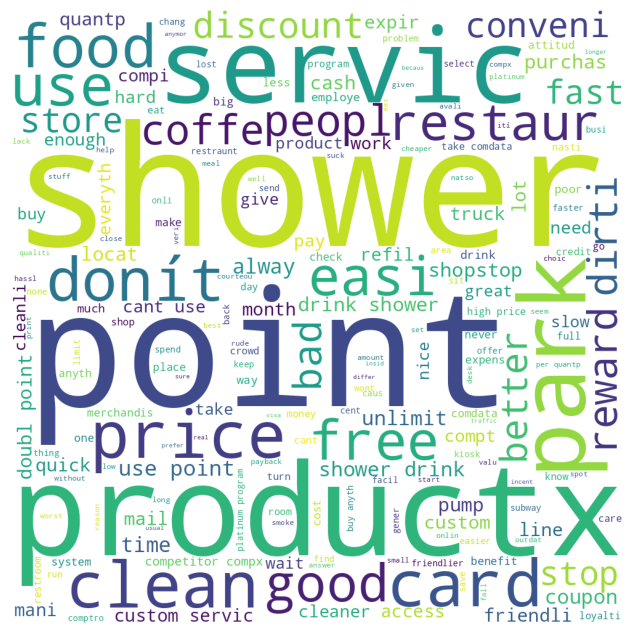

In [20]:
wordcloud = WordCloud(background_color = 'white', 
                      max_words = 200,
                      width = 1000,
                      height = 1000). generate(comment_words)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [21]:
doc_complete = gas_textGW.Comment

In [22]:
corpus = [doc.split() for doc in doc_complete]

In [23]:
corpus

[['price', 'more', 'reward', 'point', 'price'],
 ['clean',
  'shower',
  'restroom',
  'easi',
  'cash',
  '2',
  'cent',
  'per',
  'quantp',
  'credit',
  '1',
  'cent',
  'per',
  'quantp',
  'too',
  'pricey',
  'donít',
  'even',
  'use',
  'anymor'],
 ['productx',
  'price',
  'reward',
  'cash',
  'reward',
  'check',
  'too',
  'expens',
  'littl',
  'return'],
 ['food', 'shower', 'donít', 'fall'],
 ['real',
  'busi',
  'custom',
  'park',
  'productx',
  'island',
  'author',
  'make',
  'move'],
 ['point', 'food', 'shower', 'donít', 'fall'],
 ['productx', 'better', 'compt', 'not', 'sure'],
 ['conveni', 'price', 'productx', 'food', 'easi', 'use', 'harder', 'use'],
 ['cleaner',
  'friendlier',
  'peopl',
  'point',
  'longer',
  'shower',
  'rude',
  'donít',
  'take',
  'time',
  'know',
  'point',
  'cancel',
  'soon'],
 ['shower',
  'clean',
  'peopl',
  'work',
  'insid',
  'outsid',
  'nice',
  'free',
  'shower',
  'drink',
  'product',
  'much',
  'overpr',
  'no',
  'fr

In [24]:
# build word dictionary, and document term matrix.
# we can remove words that appear everywhere, that might not add value to our goal


import gensim
from gensim import corpora, models

dictionary = corpora.Dictionary(corpus)

In [25]:
# removes words that occur less than twice, and don't occur in atleast 75% of the corpus
dictionary.filter_extremes(no_below = 2, no_above = 0.75)

In [26]:
DFM = [dictionary.doc2bow(doc) for doc in corpus]

In [27]:
# number of documents
# number of features - reduced from 15k to nearly 3k. 

print(len(DFM))
print(len(dictionary))

287
280


In [28]:
# similarity
from gensim.similarities import MatrixSimilarity


In [29]:
simil = MatrixSimilarity(DFM, num_features = len(dictionary))
print(simil[DFM])

[[0.99999994 0.         0.47809142 ... 0.         0.         0.        ]
 [0.         1.         0.12909944 ... 0.12009612 0.04682929 0.        ]
 [0.47809142 0.12909944 1.0000001  ... 0.12403473 0.         0.        ]
 ...
 [0.         0.12009612 0.12403473 ... 1.0000001  0.13497637 0.19611613]
 [0.         0.04682929 0.         ... 0.13497637 0.9999998  0.22941573]
 [0.         0.         0.         ... 0.19611613 0.22941573 1.        ]]


In [30]:
distance = 1 - simil[DFM]
distance


array([[ 5.9604645e-08,  1.0000000e+00,  5.2190858e-01, ...,
         1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  0.0000000e+00,  8.7090057e-01, ...,
         8.7990391e-01,  9.5317072e-01,  1.0000000e+00],
       [ 5.2190858e-01,  8.7090057e-01, -1.1920929e-07, ...,
         8.7596524e-01,  1.0000000e+00,  1.0000000e+00],
       ...,
       [ 1.0000000e+00,  8.7990391e-01,  8.7596524e-01, ...,
        -1.1920929e-07,  8.6502361e-01,  8.0388385e-01],
       [ 1.0000000e+00,  9.5317072e-01,  1.0000000e+00, ...,
         8.6502361e-01,  1.7881393e-07,  7.7058429e-01],
       [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
         8.0388385e-01,  7.7058429e-01,  0.0000000e+00]], dtype=float32)

In [31]:
from scipy.cluster import hierarchy

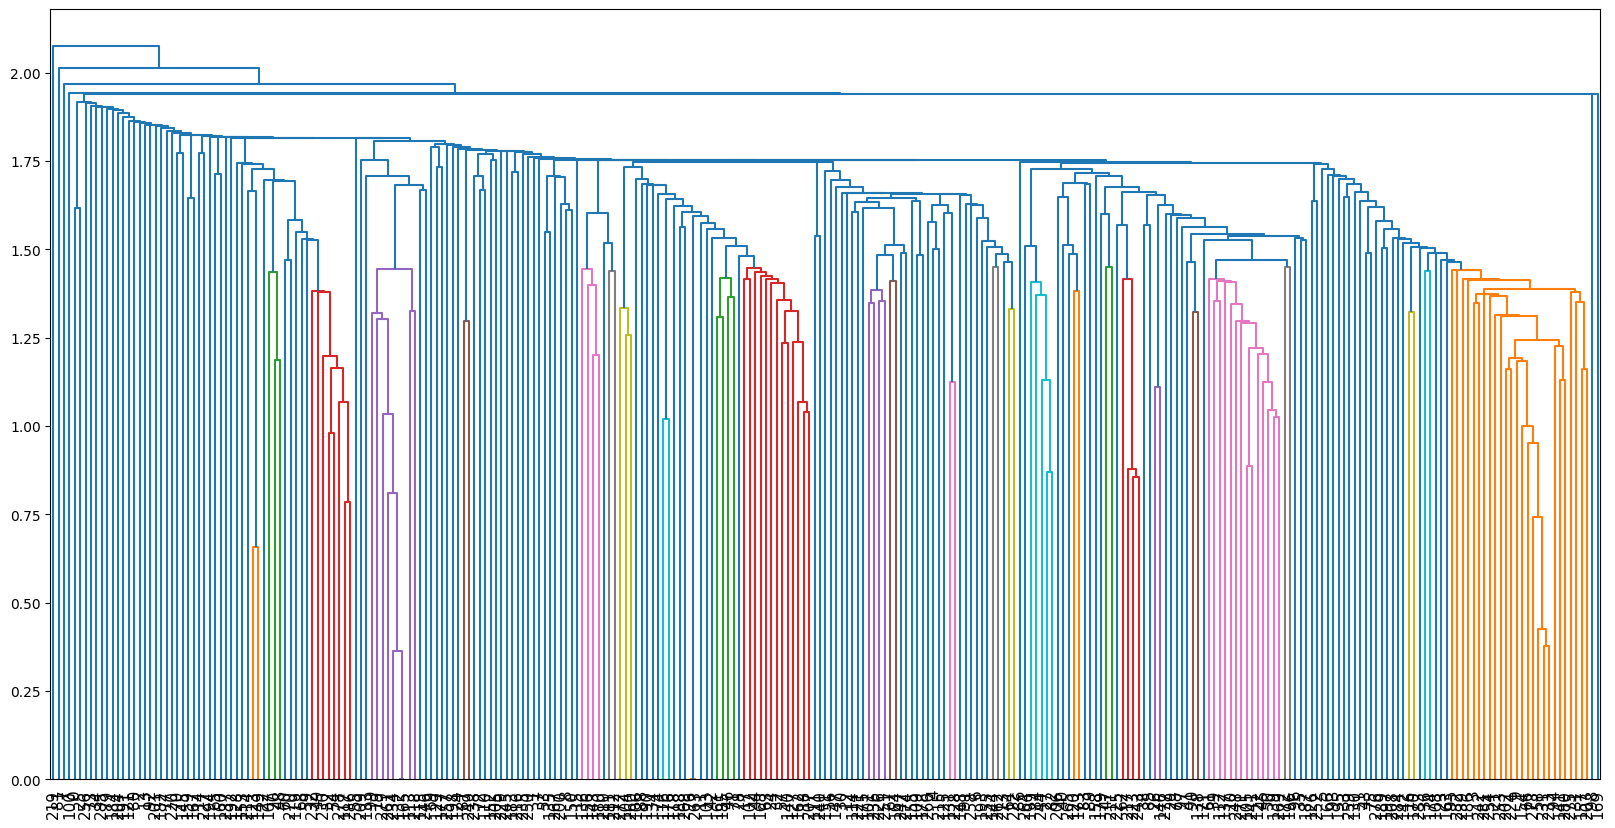

In [32]:
Z = hierarchy.linkage(distance, 'single')
plt.figure(figsize=(20,10))

dn = hierarchy.dendrogram(Z, orientation = 'top',
                          leaf_font_size = '11',
                          labels = gas_textGW.index)

In [33]:
text_simGW = pd.DataFrame(simil[DFM])


In [34]:
from gensim.models import Word2Vec

model = Word2Vec(corpus,
                 min_count=20,
                 vector_size=40,
                 workers=3,
                 window=3,
                 sg=1)

model.wv.most_similar('price', topn=5)

[('food', 0.37299278378486633),
 ('good', 0.3381979763507843),
 ('restaur', 0.3123183846473694),
 ('donít', 0.30239540338516235),
 ('shower', 0.246506929397583)]

In [35]:
model.wv.most_similar('servic', topn=5)

[('no', 0.32035166025161743),
 ('custom', 0.18398164212703705),
 ('get', 0.140633225440979),
 ('price', 0.13086050748825073),
 ('card', 0.05250594764947891)]

In [36]:
n_topics = 4

In [37]:
ldamodel = models.LdaModel(DFM,
                           num_topics=n_topics,
                           id2word=dictionary,
                           passes=40)

print(ldamodel.print_topics(num_topics=n_topics,
                            num_words=5))

# Print the top 5 terms for each of the 4 topics - optional


[(0, '0.069*"point" + 0.067*"price" + 0.054*"park" + 0.031*"productx" + 0.027*"doubl"'), (1, '0.088*"shower" + 0.059*"productx" + 0.037*"drink" + 0.034*"use" + 0.034*"get"'), (2, '0.055*"point" + 0.046*"donít" + 0.040*"shower" + 0.028*"card" + 0.027*"productx"'), (3, '0.107*"servic" + 0.047*"point" + 0.033*"custom" + 0.027*"peopl" + 0.027*"shower"')]


In [38]:
# Print the top 5 terms for each of the 4 topics - optional
for topic_id in range(ldamodel.num_topics):
    print('Topic', topic_id)
    for term, probability in ldamodel.get_topic_terms(topic_id, topn=5):
        print('\t', ldamodel.id2word[term], probability)

Topic 0
	 point 0.068994544
	 price 0.06722959
	 park 0.05381999
	 productx 0.03146213
	 doubl 0.026766105
Topic 1
	 shower 0.08809573
	 productx 0.058552995
	 drink 0.03725406
	 use 0.03389121
	 get 0.03353877
Topic 2
	 point 0.055204365
	 donít 0.045579292
	 shower 0.039975975
	 card 0.027850997
	 productx 0.027436042
Topic 3
	 servic 0.10736086
	 point 0.047219124
	 custom 0.032816786
	 peopl 0.027479295
	 shower 0.026957635


In [39]:
# custom stop word list

stop += ['shower', 'point']
gas_textGW['Comment']=gas_textGW['Comment'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop)
    
)

In [40]:
doc_completeGW = gas_textGW.Comment

In [41]:
corpusGW = [doc.split() for doc in doc_completeGW]

In [42]:
modelGW = Word2Vec(corpusGW,
                 min_count=20,
                 vector_size=40,
                 workers=3,
                 window=3,
                 sg=1)


In [43]:
dictionaryGW = corpora.Dictionary(corpusGW)

In [44]:
dictionaryGW.filter_extremes(no_below = 2, no_above = 0.75)

In [45]:
DFMGW = [dictionaryGW.doc2bow(doc) for doc in corpusGW]

In [46]:
ldamodel = models.LdaModel(DFMGW,
                           num_topics=n_topics,
                           id2word=dictionaryGW,
                           passes=40)

print(ldamodel.print_topics(num_topics=n_topics,
                            num_words=5))


[(0, '0.050*"productx" + 0.034*"card" + 0.034*"restaur" + 0.032*"bad" + 0.022*"price"'), (1, '0.065*"use" + 0.051*"drink" + 0.046*"price" + 0.043*"clean" + 0.039*"free"'), (2, '0.073*"servic" + 0.063*"donít" + 0.037*"coffe" + 0.026*"like" + 0.025*"locat"'), (3, '0.052*"productx" + 0.049*"park" + 0.044*"servic" + 0.039*"get" + 0.029*"card"')]


In [47]:
# Print the top 5 terms for each of the 4 topics - optional
for topic_id in range(ldamodel.num_topics):
    print('Topic', topic_id)
    for term, probability in ldamodel.get_topic_terms(topic_id, topn=5):
        print('\t', ldamodel.id2word[term], probability)

Topic 0
	 productx 0.04968748
	 card 0.034060985
	 restaur 0.033957627
	 bad 0.032496877
	 price 0.022090884
Topic 1
	 use 0.06469591
	 drink 0.05133166
	 price 0.046242293
	 clean 0.04324343
	 free 0.038903438
Topic 2
	 servic 0.07342693
	 donít 0.06267379
	 coffe 0.037342098
	 like 0.026388664
	 locat 0.025390647
Topic 3
	 productx 0.05191854
	 park 0.048543546
	 servic 0.044266723
	 get 0.038520932
	 card 0.029312853


In [48]:
# we can use LSA to give us a model that will give us a prediction to who the authors are
#SVD

!pip install pyLDAvis

import pyLDAvis
pyLDAvis.enable_notebook()

import pyLDAvis.gensim_models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.1 MB/s eta 0:00:00


In [49]:
vis = pyLDAvis.gensim_models.prepare(ldamodel, 
                                     DFMGW,
                                     dictionaryGW)
                                     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [50]:
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.077315 -0.038063       1        1  33.938381
1     -0.200787 -0.029067       2        1  28.913425
0      0.089830 -0.091689       3        1  21.184737
2      0.033642  0.158819       4        1  15.963457, topic_info=         Term       Freq      Total Category  logprob  loglift
88     servic  60.000000  60.000000  Default  30.0000  30.0000
37      drink  30.000000  30.000000  Default  29.0000  29.0000
9       donít  33.000000  33.000000  Default  28.0000  28.0000
14        use  53.000000  53.000000  Default  27.0000  27.0000
23       park  41.000000  41.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
44       good   3.756365  24.896126   Topic4  -4.4506  -0.0564
17   productx   3.844961  81.604192   Topic4  -4.4272  -1.2202
103     dirti   3.033495  20.339320   Topic4  -4.6643  -0.0680
14        use   3.113139  53.080426   Topic4  -4.6384  -1.0013
0       price   2.881256  44.153904   Topic4  -4.7158  -0.8946

[233 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2         2  0.187693      1
2         3  0.187693      1
2         4  0.563079      1
177       2  0.928113   1000
249       2  0.754922      6
...     ...       ...    ...
43        2  0.451413   work
43        3  0.112853   work
43        4  0.338560   work
188       1  0.840493  worst
175       2  0.754902   year

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [51]:
len(dictionaryGW)
tfidf = models.TfidfModel(DFMGW)
DFM_tfidfGW = tfidf[DFMGW]



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
n_SVD=8

SVD_modelGW = models.LsiModel(DFM_tfidfGW,
                            id2word=dictionaryGW,
                            num_topics=n_SVD)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [53]:
SVDGW = SVD_modelGW[DFM_tfidfGW]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# singular values
singular_values = np.array(SVD_modelGW.projection.s) # singular values
print(singular_values)

[3.62947169 2.77156987 2.50777646 2.45173777 2.34199026 2.31880807
 2.19534807 2.15686671]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 8 artists>

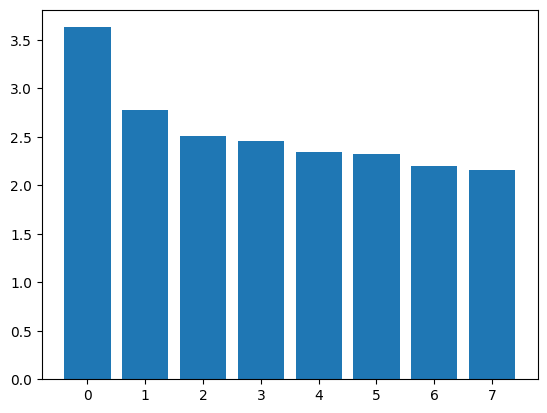

In [55]:
plt.bar(range(len(singular_values)), singular_values)

In [56]:
svd_arrayGW = gensim.matutils.corpus2csc(SVDGW).T.toarray()
svd_dfGW = pd.DataFrame(svd_arrayGW)
svd_dfGW


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7
0,0.375018,0.702029,-0.087523,-0.085708,0.009466,0.203111,0.128384,-0.151782
1,0.143457,-0.025464,0.075212,-0.001238,-0.019769,-0.079918,-0.014248,-0.010796
2,0.244966,0.235905,0.003851,0.024011,-0.054617,0.170704,0.053413,-0.100950
3,0.144927,-0.007465,0.104718,0.233355,0.066404,-0.320916,0.066816,-0.223999
4,0.158282,-0.087909,-0.025777,0.128089,0.060251,0.100268,-0.109536,-0.041627
...,...,...,...,...,...,...,...,...
282,0.189267,-0.133564,0.146085,-0.197273,0.067992,-0.025490,-0.118711,-0.073064
283,0.115224,-0.102965,0.181815,-0.209657,0.053300,-0.020060,-0.054341,-0.095611
284,0.222870,-0.150352,0.078569,-0.237867,0.056651,-0.039958,-0.049330,-0.085319
285,0.280341,-0.117421,-0.010894,-0.040748,-0.148311,0.102302,-0.029254,-0.023101


In [57]:
# we want to rename the unnammed column to the specific comment, otherwise it will call the first column 0,1,2,etc
model_dfGW = pd.concat([gas_textGW.reset_index()['Comment'], svd_dfGW],
axis = 1,
ignore_index = True).rename({0:'Comment'}, axis = 1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
gas_textGW1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cust_ID,Target,Service_flag,CustType_flag,Contact_flag,new_flag,Choice_flag,Loyal_Status,Comp_card_flag,AcctType_flag,Contact_Flag2,HQ_flag,Multi_flag,NewCust_Flag
0,1,1,2,2,1,2,1,1,0,0,0,0,0,0
1,10,1,1,1,1,2,1,1,0,0,0,0,0,0
2,100,0,1,2,2,2,1,1,0,0,0,0,0,0
3,102,0,2,2,1,1,1,1,0,0,0,0,0,0
4,103,0,2,2,1,2,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,94,1,2,1,1,2,1,1,0,0,0,0,0,0
283,95,1,1,2,1,1,1,3,0,0,0,0,0,0
284,96,1,1,2,1,1,1,3,0,0,0,0,0,0
285,98,0,1,2,1,2,1,1,0,0,0,0,0,0


In [105]:
model_dfGW4 = pd.concat([gas_textGW1, svd_dfGW], axis = 1,
ignore_index = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
model_dfGW4

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,1,2,2,1,2,1,1,0,0,...,0,0,0.375018,0.702029,-0.087523,-0.085708,0.009466,0.203111,0.128384,-0.151782
1,10,1,1,1,1,2,1,1,0,0,...,0,0,0.143457,-0.025464,0.075212,-0.001238,-0.019769,-0.079918,-0.014248,-0.010796
2,100,0,1,2,2,2,1,1,0,0,...,0,0,0.244966,0.235905,0.003851,0.024011,-0.054617,0.170704,0.053413,-0.100950
3,102,0,2,2,1,1,1,1,0,0,...,0,0,0.144927,-0.007465,0.104718,0.233355,0.066404,-0.320916,0.066816,-0.223999
4,103,0,2,2,1,2,1,1,0,0,...,0,1,0.158282,-0.087909,-0.025777,0.128089,0.060251,0.100268,-0.109536,-0.041627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,94,1,2,1,1,2,1,1,0,0,...,0,0,0.189267,-0.133564,0.146085,-0.197273,0.067992,-0.025490,-0.118711,-0.073064
283,95,1,1,2,1,1,1,3,0,0,...,0,0,0.115224,-0.102965,0.181815,-0.209657,0.053300,-0.020060,-0.054341,-0.095611
284,96,1,1,2,1,1,1,3,0,0,...,0,0,0.222870,-0.150352,0.078569,-0.237867,0.056651,-0.039958,-0.049330,-0.085319
285,98,0,1,2,1,2,1,1,0,0,...,0,0,0.280341,-0.117421,-0.010894,-0.040748,-0.148311,0.102302,-0.029254,-0.023101


In [107]:
model_dfGW4.columns = model_dfGW4.columns.astype(str)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
X1 = model_dfGW4.drop(columns=['1'])
y1 = model_dfGW4['1']

from sklearn.model_selection import train_test_split

X_trainGW7, X_valGW7, y_trainGW7, y_valGW7 = train_test_split(X1,y1, test_size=0.3, random_state=0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
model_dfGW

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment,1,2,3,4,5,6,7,8
0,price reward price,0.375018,0.702029,-0.087523,-0.085708,0.009466,0.203111,0.128384,-0.151782
1,clean restroom easi cash 2 cent per quantp cre...,0.143457,-0.025464,0.075212,-0.001238,-0.019769,-0.079918,-0.014248,-0.010796
2,productx price reward cash reward check expens...,0.244966,0.235905,0.003851,0.024011,-0.054617,0.170704,0.053413,-0.100950
3,food donít fall,0.144927,-0.007465,0.104718,0.233355,0.066404,-0.320916,0.066816,-0.223999
4,real busi custom park productx island author m...,0.158282,-0.087909,-0.025777,0.128089,0.060251,0.100268,-0.109536,-0.041627
...,...,...,...,...,...,...,...,...,...
282,gener cleaner peopl tend better shopstop harde...,0.189267,-0.133564,0.146085,-0.197273,0.067992,-0.025490,-0.118711,-0.073064
283,free pop coffe refil 1000 quantp previou month...,0.115224,-0.102965,0.181815,-0.209657,0.053300,-0.020060,-0.054341,-0.095611
284,free pop coffe refil 1000 quantp previou month...,0.222870,-0.150352,0.078569,-0.237867,0.056651,-0.039958,-0.049330,-0.085319
285,believ clean truck stop good servic shopstop n...,0.280341,-0.117421,-0.010894,-0.040748,-0.148311,0.102302,-0.029254,-0.023101


In [59]:
# partition
testDataGW = model_dfGW[(model_dfGW['Comment']==True)]
trainDataGW = model_dfGW[-(model_dfGW['Comment']==True)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
y_trainGW = trainDataGW['Comment']
x_trainGW = trainDataGW[trainDataGW.columns[trainDataGW.columns !='Comment']]
x_testGW = testDataGW[testDataGW.columns[testDataGW.columns !='Comment']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
XGW = gas_textGW.drop(columns=['Target'])
yGW = gas_textGW['Target']

from sklearn.model_selection import train_test_split

X_trainGW1, X_valGW1, y_trainGW1, y_valGW1 = train_test_split(X,y, test_size=0.3, random_state=0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

tree.fit(x_trainGW,y_trainGW)
tree.score(x_trainGW,y_trainGW)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9860627177700348

In [65]:
tree2 = DecisionTreeClassifier(random_state=0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
gas_textGW

In [66]:
gas_textGW1=gas_textGW.drop(['Comment'],axis=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
gas_textGW1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cust_ID,Target,Service_flag,CustType_flag,Contact_flag,new_flag,Choice_flag,Loyal_Status,Comp_card_flag,AcctType_flag,Contact_Flag2,HQ_flag,Multi_flag,NewCust_Flag
0,1,1,2,2,1,2,1,1,0,0,0,0,0,0
1,10,1,1,1,1,2,1,1,0,0,0,0,0,0
2,100,0,1,2,2,2,1,1,0,0,0,0,0,0
3,102,0,2,2,1,1,1,1,0,0,0,0,0,0
4,103,0,2,2,1,2,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,94,1,2,1,1,2,1,1,0,0,0,0,0,0
283,95,1,1,2,1,1,1,3,0,0,0,0,0,0
284,96,1,1,2,1,1,1,3,0,0,0,0,0,0
285,98,0,1,2,1,2,1,1,0,0,0,0,0,0


In [68]:
X = gas_textGW1.drop(columns=['Target'])
y = gas_textGW1['Target']

from sklearn.model_selection import train_test_split

X_trainGW2, X_valGW2, y_trainGW2, y_valGW2 = train_test_split(X,y, test_size=0.3, random_state=0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:

testDataGW1 = gas_textGW1[(gas_textGW1['Target']==True)]
trainDataGW1 = gas_textGW1[-(gas_textGW1['Target']==True)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
y_trainGW1 = trainDataGW1['Target']
x_trainGW1 = trainDataGW1[trainDataGW1.columns[trainDataGW1.columns !='Target']]
x_testGW1 = testDataGW1[testDataGW1.columns[testDataGW1.columns !='Target']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
from sklearn.tree import DecisionTreeClassifier

tree3 = DecisionTreeClassifier(random_state=0)

tree3.fit(X_trainGW2,y_trainGW2)
tree3.score(X_trainGW2,y_trainGW2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
tree2.fit(x_trainGW1,y_trainGW1)
tree2.score(x_trainGW1,y_trainGW1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5172413793103449

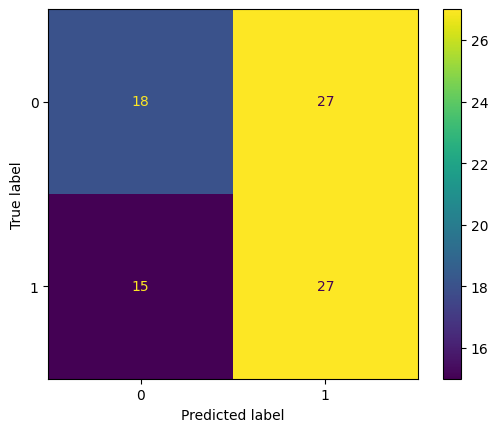

In [74]:
prediction_prob = tree3.predict(X_valGW2)
prediction = list(map(round, prediction_prob))
cm = confusion_matrix(y_valGW2, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy_score(y_valGW2, prediction)

In [109]:
tree7 = DecisionTreeClassifier(random_state=0)

tree7.fit(X_trainGW7,y_trainGW7)
tree7.score(X_trainGW7,y_trainGW7)



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5402298850574713

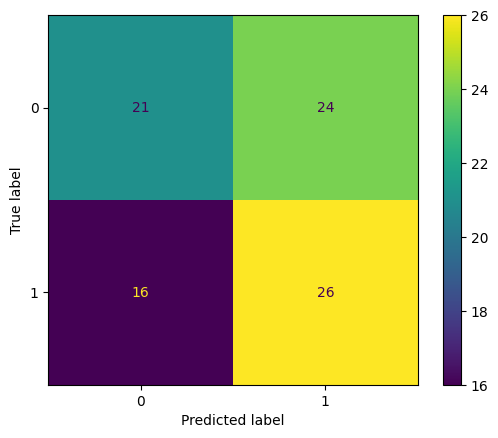

In [111]:
prediction_prob = tree7.predict(X_valGW7)
prediction = list(map(round, prediction_prob))
cm2 = confusion_matrix(y_valGW7, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()

accuracy_score(y_valGW7, prediction)
